In [1]:
%matplotlib inline

import re
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats
from io import StringIO
from Bio import SeqIO
from Bio import Phylo
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import IUPAC
from Bio.Seq import Seq
from Bio import Align

from Bio.Phylo.TreeConstruction import TreeConstructor


# adding project folder to lib search path
project = "/".join((*os.path.split(os.getcwd()), 'scripts'))
if project not in sys.path:
    sys.path.append(project)
    
import loader
import work_with_files
import patients_data
# import quantitative_analyze
import tree_builder

### Downloading data

In [2]:
# making loader class

downloader = loader.Loader()

In [3]:
# downloading all needed data

downloader.load_all()

## Example work with tree_builder module

Let's build ML tree for V3 region of p1 patient

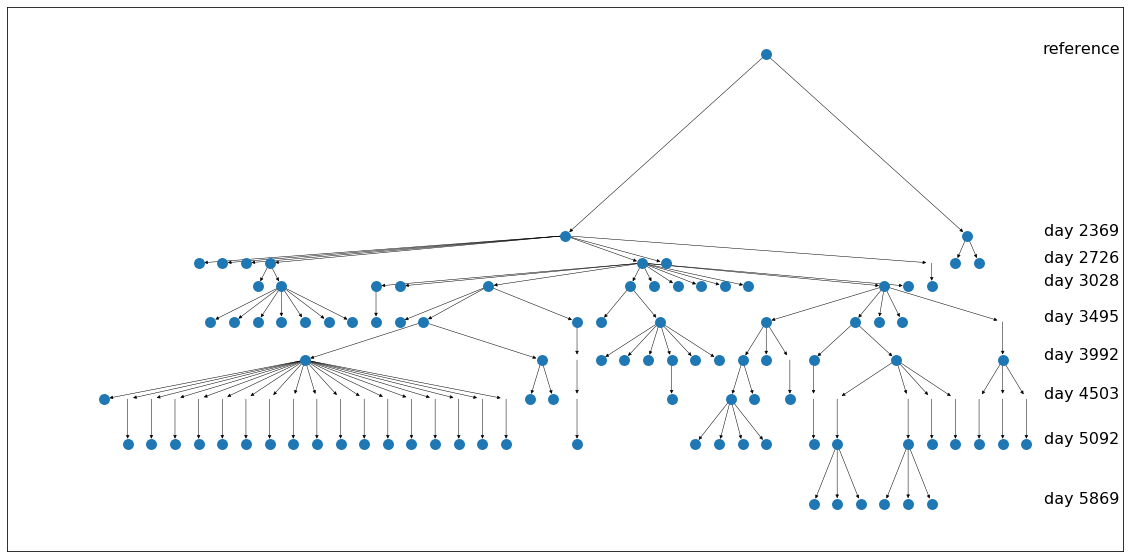

In [5]:
tree_p7_ML = tree_builder.Phylo_tree('p7', 'V3') # acquisition of data and perhaps making alignment
tree_p7_ML.build_tree(p=0.1, tree_type='ML', quiet=True) # constructing ML tree
tree_p7_ML.plot((20,10), virt_nodes=1, topo=0, days_scaling=0) # ploting tree

We can also build MP tree with the same p value (I mean not p-value!)

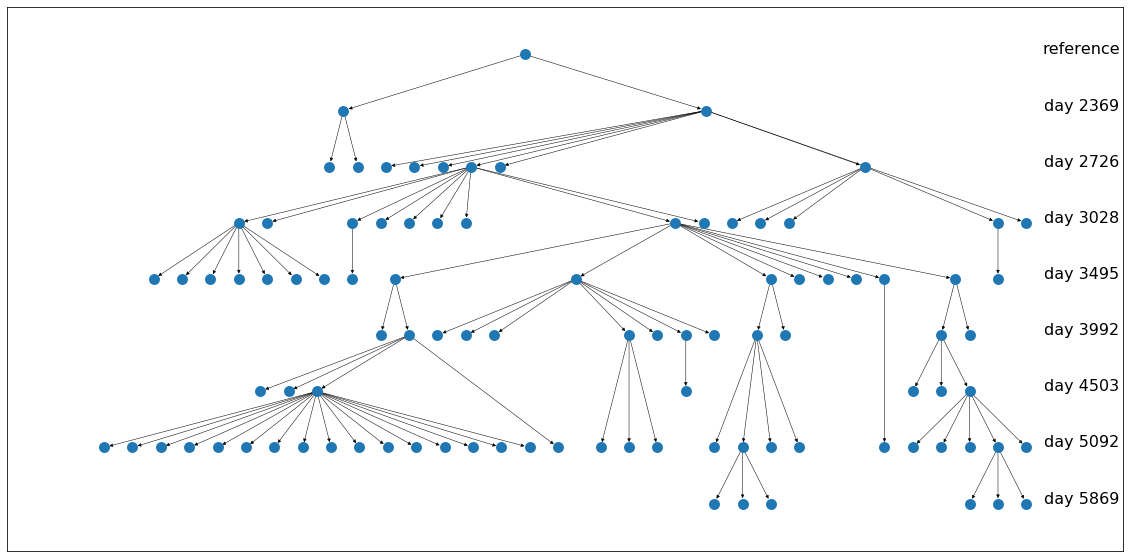

In [6]:
tree_p7_MP = tree_builder.Phylo_tree('p7', 'V3')
tree_p7_MP.build_tree(p=0.1, tree_type='MP')
tree_p7_MP.plot((20,10), virt_nodes=0, topo=2)

Maybe the probobility of finding haplotype is bigger? Let's increase p

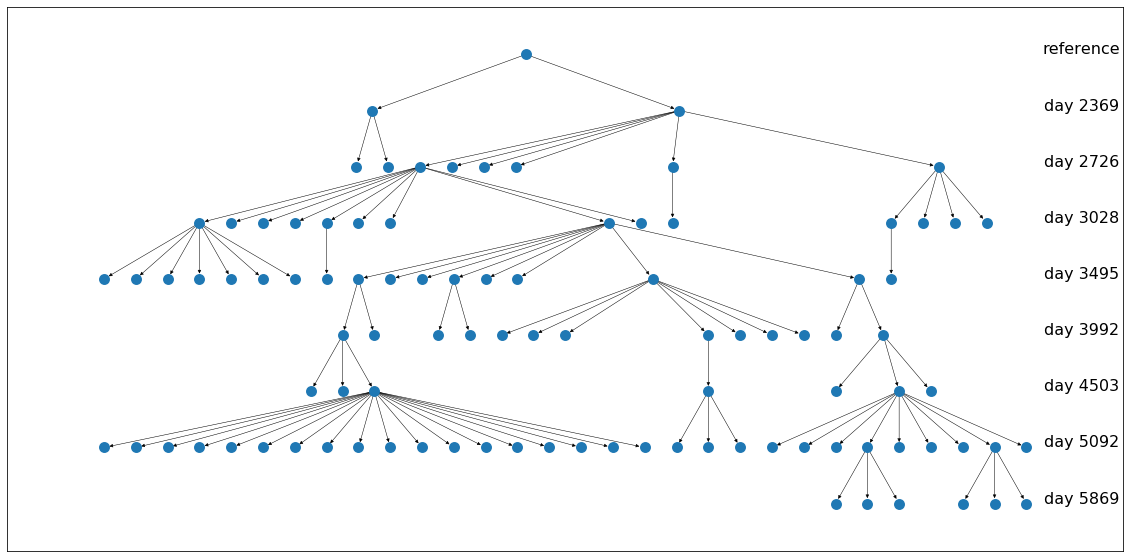

In [7]:
tree_p7_MP = tree_builder.Phylo_tree('p7', 'V3')
tree_p7_MP.build_tree(0.9, tree_type='MP')
tree_p7_MP.plot((20,10), virt_nodes=0, topo=0)

Now there are not multy-level edges!

And for another patient:

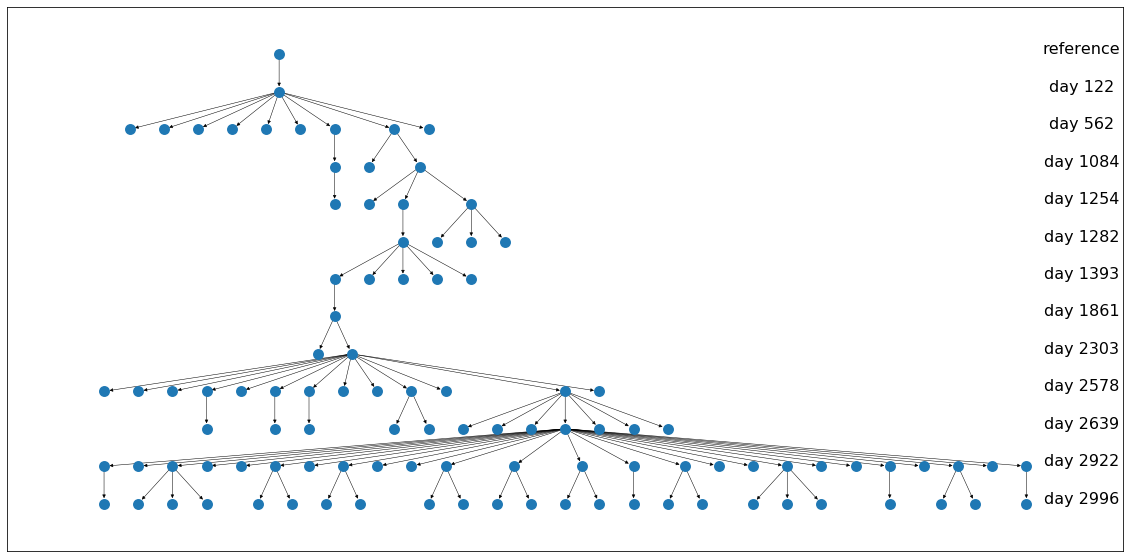

In [5]:
tree_p1_ML = tree_builder.Phylo_tree('p1', 'V3')
tree_p1_ML.build_tree(0.9, tree_type='ML')
tree_p1_ML.plot((20,10), virt_nodes=0, topo=0)

Oh! Sequences wasn't all the same length. But we fixed it!

And what about proteins?

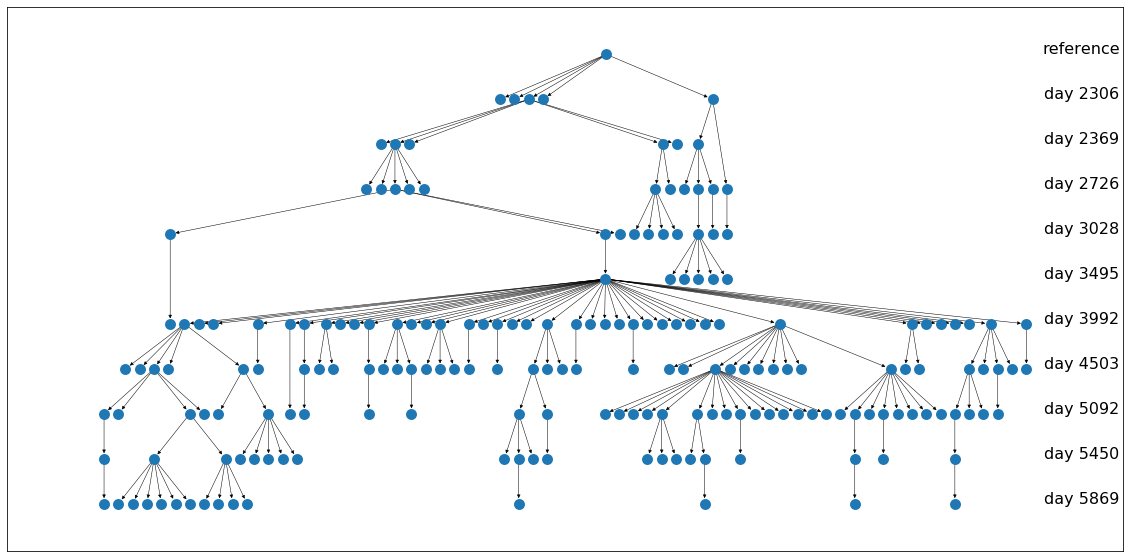

In [6]:
tree_p7_ML_protein = tree_builder.Phylo_tree('p7', 'p17', data='protein')
tree_p7_ML_protein.build_tree(0.9, tree_type='ML')
tree_p7_ML_protein.plot((20,10), virt_nodes=0, topo=0)

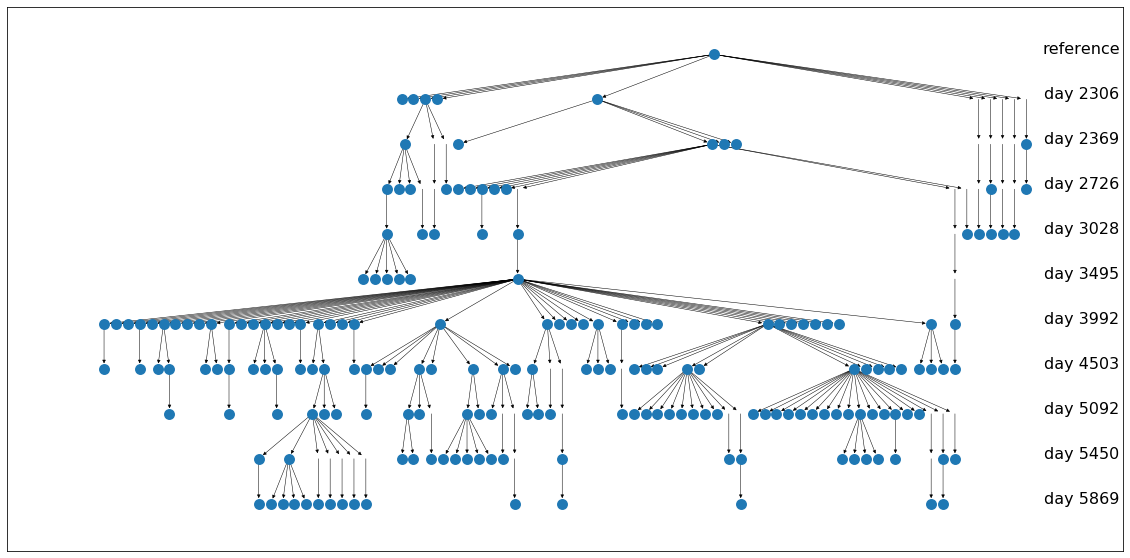

In [16]:
tree_p7_MP_protein = tree_builder.Phylo_tree('p7', 'p17', data='protein')
tree_p7_MP_protein.build_tree(0.9, tree_type='MP')
tree_p7_MP_protein.plot((20,10), virt_nodes=1, topo=22)

### Working with gp120 reconstructed by Lolita

There is no such information in "data", but we have alignment file in fasta format. "alignment" argument is exactly for this case!

Warning! Sequences are not all the same length!
Alignment occurs...


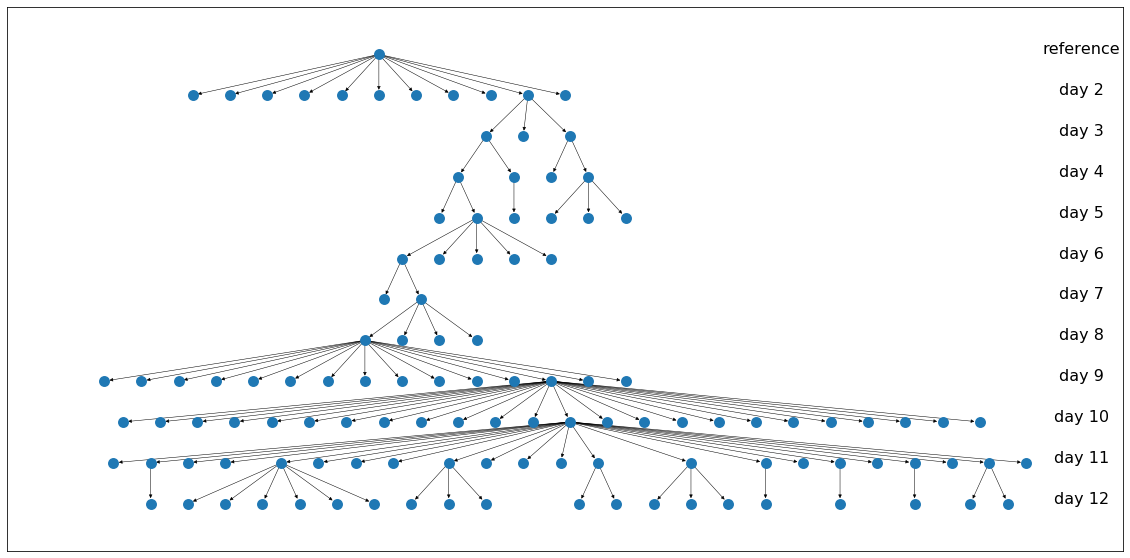

In [11]:
tree_p1_gp120 = tree_builder.Phylo_tree('p1', 'gp120', data='DNA', alignment=('p1_gp120.fasta', 'fasta'))
tree_p1_gp120.build_tree(0.7, tree_type='ML')
tree_p1_gp120.plot((20,10), virt_nodes=0, topo=1)

Let's get all paths from first to last day!

In [12]:
paths = tree_p1_gp120.get_paths()
len(paths)

20